In [136]:
import cv2
import os
import random
import shutil

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
influencers_data = '/Users/mshayganfar/sb_capstone/data/influencers.csv'

In [3]:
df_influencers = pd.read_csv(influencers_data)

In [5]:
df_influencers.head()

,username,category,num_followers,num_followees,num_posts
0,makeupbynvs,beauty,1432.0,1089.0,363.0
1,jaquelinevandoski,beauty,137600.0,548.0,569.0
2,anisaartistry,beauty,64644.0,289.0,391.0
3,rubina_muartistry,beauty,496406.0,742.0,887.0
4,beautyxabbi,beauty,2050.0,1423.0,751.0


In [6]:
beauty_influencers_count = df_influencers[df_influencers['category'] == 'beauty'].username.count()

print(f"Beauty influencers count: {beauty_influencers_count}")

Beauty influencers count: 1541


In [119]:
NUM_OF_INFLUENCERS = 10
NUM_OF_FILES_PER_INFLUENCER = 10
SEED_NUMBER = 8

In [310]:
src_image_folders_base     = '/Users/mshayganfar/Mahni_Folder/Mahni/Influencers/images/'
dst_image_folders_base     = '/Users/mshayganfar/Mahni_Folder/Mahni/Influencers/Beauty/subset_images/'
resized_image_folders_base = '/Users/mshayganfar/Mahni_Folder/Mahni/Influencers/Beauty/resized_images/'
image_classes_folder_base  = '/Users/mshayganfar/Mahni_Folder/Mahni/Influencers/Beauty/Classes/'
test_image_folder_base     = '/Users/mshayganfar/Mahni_Folder/Mahni/Influencers/Test/beauty/'

### Image Preparation

In [9]:
def load_image(image_path, image_name):
    image = cv2.imread(os.path.join(image_path, image_name))
    # print(os.path.join(image_path, image_name))
    return image

In [10]:
def resize_image(src_image, width, height):
    # print('Original Image Dimensions: ', src_image.shape)
    
    dim = (width, height)
    
    # resize image
    resized_image = cv2.resize(src_image, dim, interpolation=cv2.INTER_AREA)
    
    # print('Resized Image Dimensions : ', resized_image.shape)
    
    return resized_image

In [11]:
def save_image(image_path, image_name, image):
    cv2.imwrite(os.path.join(image_path , image_name), image)

In [12]:
# Resizing and saving subsampled images into a new folder

def save_resized_images(dst_image_folder, resized_image_folder):
    
    filenames = os.listdir(dst_image_folder + '.')
    
    for filename in filenames:
        if filename[-3:] == 'jpg':
            loaded_image  = load_image(dst_image_folder, filename)
            resized_image = resize_image(loaded_image, 50, 50)
            save_image(resized_image_folder, 'small_' + filename, resized_image)

### Get Subset of Influencers' Images

In [120]:
# Randomly picking N usernames

def get_random_usernames(df, influencers_count, num_of_influencers, verbose):
    username_list = []

    random.seed(SEED_NUMBER)
    random_numbers = random.sample(range(0, influencers_count-1), num_of_influencers)

    for row_index in random_numbers:
        username_list.append(df.iloc[row_index].username)

    if verbose:
        print(username_list)
    
    return username_list

In [121]:
# Extracting image file names

def extract_image_file_names(username_list, src_image_folder):

    filenames_list = []

    for username in username_list:
        first_char = username[0]
        if first_char.isalpha() == False:
            first_char = '_'
        # check if file exist in destination
        if os.path.exists(src_image_folder + first_char):
            specific_folder = src_image_folder + first_char + '/'
            filenames = [filename for filename in os.listdir(specific_folder + '.') if filename.startswith(username)]
            filenames_list.append(filenames)
        else:
            print(f"Folder {first_char} doesn't exist!")
            
    return filenames_list

In [122]:
# Subsampling image files for all of the influencers

def get_influencers_random_subsampled_files(filenames_list, num_of_files_per_influencer):
    
    subsampled_filename_list = []

    random.seed(SEED_NUMBER)

    for i in range(0, len(filenames_list)):
        influencer_image_filenames = []
        random_numbers = random.sample(range(0, len(filenames_list[i])-1), num_of_files_per_influencer)

        for file_index in random_numbers:
            influencer_image_filenames.append(filenames_list[i][file_index])

        subsampled_filename_list.append(influencer_image_filenames)
        
    return subsampled_filename_list

In [123]:
# Copying the subsampled files into the destination folder

def copy_influencers_files(subsampled_filenames, src_folder_base, dst_folder_base):

    for i in range(0, len(subsampled_filenames)):
        for j in range(0, len(subsampled_filenames[i])):
            filename = subsampled_filenames[i][j]
            first_char = filename[0]
            if first_char.isalpha() == False:
                first_char = '_'
            # check if file exist in destination
            if os.path.exists(src_folder_base + first_char):
                specific_src_folder = src_folder_base + first_char + '/'
                shutil.copy(specific_src_folder + filename, dst_folder_base + filename)
            else:
                print(f"Folder {first_char} doesn't exist!")

In [124]:
usernames = get_random_usernames(df_influencers, beauty_influencers_count, NUM_OF_INFLUENCERS, True)

['4everestherr', 'monicastylemuse', 'tashasilvestre', 'amieyoungmua', 'neworleansnaturalhairexpo', 'missemanuelle', 'lilybetzabee', 'megfeather', 'kesulatko_makeup', 'carobouvette']


In [125]:
filenames = extract_image_file_names(usernames, src_image_folders_base)

In [126]:
influencers_subsampled_filenames = get_influencers_random_subsampled_files(filenames, NUM_OF_FILES_PER_INFLUENCER)

In [127]:
copy_influencers_files(influencers_subsampled_filenames, src_image_folders_base, dst_image_folders_base)

In [128]:
save_resized_images(dst_image_folders_base, resized_image_folders_base)

### Get Specific Influencer's Images

In [22]:
# Reading N files of a specific influencer

def get_influencer_files(image_folder, username):

    first_char = username[0]
    if first_char.isalpha() == False:
        first_char = '_'
    # check if file exist in destination
    if os.path.exists(image_folder + first_char):
        specific_folder = image_folder + first_char + '/'
        filenames = [filename for filename in os.listdir(specific_folder + '.') if filename.startswith(username)]
    else:
        print(f"Folder {first_char} doesn't exist!")

    return filenames

In [23]:
# Subsampling image files

def get_influencr_random_subsampled_files(filenames, number_of_files):
    
    subsampled_filename_list = []

    random.seed(SEED_NUMBER)

    random_numbers = random.sample(range(0, len(filenames)-1), number_of_files)
    
    for file_index in random_numbers:
        subsampled_filename_list.append(filenames[file_index])
        
    return subsampled_filename_list

In [24]:
# Copying the subsampled files into the destination folder

def copy_influencer_files(filenames, src_folder_base, dst_folder_base):
    
    for i in range(0, len(filenames)):
        filename = filenames[i]
        first_char = filename[0]
        if first_char.isalpha() == False:
            first_char = '_'
        # check if file exist in destination
        if os.path.exists(src_folder_base + first_char):
            specific_src_folder = src_folder_base + first_char + '/'
            shutil.copy(specific_src_folder + filename, dst_image_folders_base + filename)
        else:
            print(f"Folder {first_char} doesn't exist!")

In [25]:
influencer_filenames = get_influencer_files(src_image_folders_base, 'zodieac')

In [26]:
influencer_subsampled_filenames = get_influencr_random_subsampled_files(influencer_filenames, 150)

In [27]:
copy_influencer_files(influencer_subsampled_filenames, src_image_folders_base, dst_image_folders_base)

In [28]:
save_resized_images(dst_image_folders_base, resized_image_folders_base)

### Other Categories Image Preparation

In [35]:
sampled_filenames_dict = {'eye':[], 'face':[], 'hair':[], 'lips':[], 'nail':[], 'products':[]}

In [38]:
# Reading image file names

for category in list(sampled_filenames_dict.keys()):
    # check if file exists in destination
    specific_folder = image_classes_folder_base + category.capitalize() + '/' + category + '/'
    filenames = [filename for filename in os.listdir(specific_folder + '.') if filename.endswith('.jpg')]
    sampled_filenames_dict[category] = filenames

    print(f"Category {category} is done.")

Category eye is done.
Category face is done.
Category hair is done.
Category lips is done.
Category nail is done.
Category products is done.


In [40]:
# Copying files from other categories into the "not_<category>" folders

for category in sampled_filenames_dict:
    number_of_files = len(sampled_filenames_dict[category])
    number_of_files_per_category = number_of_files//5
    for other_category in list(sampled_filenames_dict.keys()):
        if other_category != category:
            number_of_files_in_other_category = len(sampled_filenames_dict[other_category])
            random_numbers = random.sample(range(0, number_of_files_in_other_category-1), number_of_files_per_category)
            for file_index in random_numbers:
                filename = sampled_filenames_dict[other_category][file_index]
                src_folder = image_classes_folder_base + other_category.capitalize() + '/' + other_category + '/'
                dst_folder = image_classes_folder_base + category.capitalize() + '/not_' + category + '/'
                if os.path.exists(src_folder + filename):
                    shutil.copy(src_folder + filename, dst_folder + filename)
                else:
                    print(f"File {filename} doesn't exist in this {src_folder}!")
    print(f"Category {category} is done.")

Category eye is done.
Category face is done.
Category hair is done.
Category lips is done.
Category nail is done.
Category products is done.


In [49]:
import tensorflow as tf

from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [42]:
batch_size   = 32
image_height = 50
image_width  = 50

## Beauty >> Eye Model

In [45]:
eye_images = image_classes_folder_base + 'Eye/'

In [56]:
eye_train_images = tf.keras.preprocessing.image_dataset_from_directory(
    eye_images,
    labels='inferred',
    label_mode='int',
    class_names=['eye', 'not_eye'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.15,
    subset="training"
)

Found 631 files belonging to 2 classes.
Using 537 files for training.


In [57]:
eye_validation_images = tf.keras.preprocessing.image_dataset_from_directory(
    eye_images,
    labels='inferred',
    label_mode='int',
    class_names=['eye', 'not_eye'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.15,
    subset="validation"
)

Found 631 files belonging to 2 classes.
Using 94 files for validation.


In [176]:
eye_model = Sequential()

# CONVOLUTIONAL LAYER
eye_model.add(Conv2D(filters=32,
                     kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                     kernel_size=(3, 3), 
                     input_shape=(50, 50, 3), 
                     activation='relu'))

# POOLING LAYER
eye_model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
eye_model.add(Conv2D(filters=64,
                     kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                     kernel_size=(3, 3), 
                     activation='relu'))

# POOLING LAYER & DROPOUT
eye_model.add(MaxPool2D(pool_size=(2, 2)))
eye_model.add(Dropout(0.5))

# CONVOLUTIONAL LAYER
eye_model.add(Conv2D(filters=64, 
                     kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                     kernel_size=(3, 3), 
                     activation='relu'))

# POOLING LAYER & DROPOUT
eye_model.add(MaxPool2D(pool_size=(2, 2)))
eye_model.add(Dropout(0.5))

# FLATTEN IMAGES FROM 50 by 50 to 2500 BEFORE FINAL LAYER
eye_model.add(Flatten(input_shape=(50, 50, 3)))

# 128 NEURONS IN DENSE HIDDEN LAYER
eye_model.add(Dense(128, 
                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), 
                    activation='relu'))
eye_model.add(Dropout(0.5))

# 64 NEURONS IN DENSE HIDDEN LAYER
eye_model.add(Dense(64, 
                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), 
                    activation='relu'))
eye_model.add(Dropout(0.5))

# LAST LAYER IS THE CLASSIFIER
eye_model.add(Dense(1, activation='sigmoid'))

In [177]:
eye_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 11, 11, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 9, 9, 64)         

In [178]:
eye_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [179]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [180]:
eye_history = eye_model.fit(eye_train_images,
                            validation_data=eye_validation_images,
                            epochs=150,
                            callbacks=[early_stop])

Epoch 1/150
17/17 [==============================] - 1s 49ms/step - loss: 22.1693 - accuracy: 0.4804 - val_loss: 8.4930 - val_accuracy: 0.6596
Epoch 2/150
17/17 [==============================] - 1s 41ms/step - loss: 10.0267 - accuracy: 0.4842 - val_loss: 8.4272 - val_accuracy: 0.5319
Epoch 3/150
17/17 [==============================] - 1s 41ms/step - loss: 8.6123 - accuracy: 0.5400 - val_loss: 8.3344 - val_accuracy: 0.4574
Epoch 4/150
17/17 [==============================] - 1s 40ms/step - loss: 8.4008 - accuracy: 0.5345 - val_loss: 8.2569 - val_accuracy: 0.4894
Epoch 5/150
17/17 [==============================] - 1s 41ms/step - loss: 8.2509 - accuracy: 0.5419 - val_loss: 8.1784 - val_accuracy: 0.5319
Epoch 6/150
17/17 [==============================] - 1s 40ms/step - loss: 8.1887 - accuracy: 0.5475 - val_loss: 8.0968 - val_accuracy: 0.5000
Epoch 7/150
17/17 [==============================] - 1s 41ms/step - loss: 8.1023 - accuracy: 0.5102 - val_loss: 8.0170 - val_accuracy: 0.5213
Epoc

17/17 [==============================] - 1s 43ms/step - loss: 3.9168 - accuracy: 0.9106 - val_loss: 3.9090 - val_accuracy: 0.9149
Epoch 59/150
17/17 [==============================] - 1s 43ms/step - loss: 3.8325 - accuracy: 0.9497 - val_loss: 3.8188 - val_accuracy: 0.9149
Epoch 60/150
17/17 [==============================] - 1s 43ms/step - loss: 3.7886 - accuracy: 0.9404 - val_loss: 3.8070 - val_accuracy: 0.9362
Epoch 61/150
17/17 [==============================] - 1s 44ms/step - loss: 3.7088 - accuracy: 0.9497 - val_loss: 3.7775 - val_accuracy: 0.9362
Epoch 62/150
17/17 [==============================] - 1s 45ms/step - loss: 3.6554 - accuracy: 0.9385 - val_loss: 3.7391 - val_accuracy: 0.9043
Epoch 63/150
17/17 [==============================] - 1s 46ms/step - loss: 3.5880 - accuracy: 0.9423 - val_loss: 3.6051 - val_accuracy: 0.9574
Epoch 64/150
17/17 [==============================] - 1s 47ms/step - loss: 3.5669 - accuracy: 0.9330 - val_loss: 3.5802 - val_accuracy: 0.9362
Epoch 65/150

17/17 [==============================] - 1s 46ms/step - loss: 1.5549 - accuracy: 0.9721 - val_loss: 1.6249 - val_accuracy: 0.9362
Epoch 116/150
17/17 [==============================] - 1s 48ms/step - loss: 1.5306 - accuracy: 0.9683 - val_loss: 1.6228 - val_accuracy: 0.9362
Epoch 117/150
17/17 [==============================] - 1s 47ms/step - loss: 1.5365 - accuracy: 0.9758 - val_loss: 1.6925 - val_accuracy: 0.9043
Epoch 118/150
17/17 [==============================] - 1s 47ms/step - loss: 1.5432 - accuracy: 0.9609 - val_loss: 1.6143 - val_accuracy: 0.9149
Epoch 119/150
17/17 [==============================] - 1s 47ms/step - loss: 1.4543 - accuracy: 0.9665 - val_loss: 1.7011 - val_accuracy: 0.8830
Epoch 120/150
17/17 [==============================] - 1s 47ms/step - loss: 1.4587 - accuracy: 0.9609 - val_loss: 1.5446 - val_accuracy: 0.9362
Epoch 121/150
17/17 [==============================] - 1s 47ms/step - loss: 1.4532 - accuracy: 0.9590 - val_loss: 1.5328 - val_accuracy: 0.9255
Epoch 

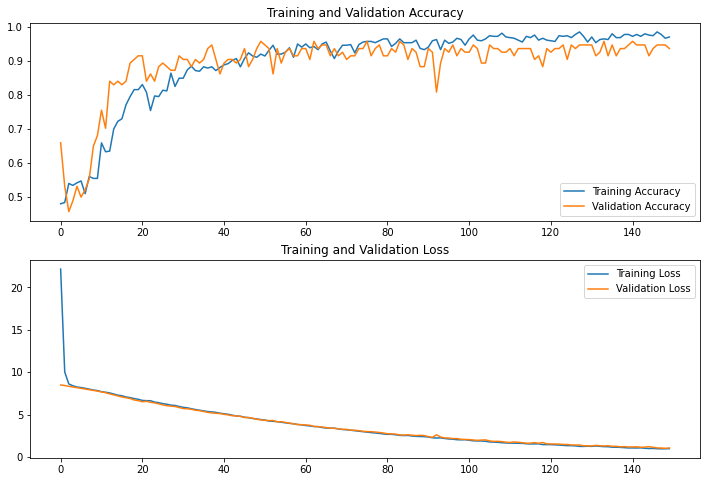

In [235]:
acc = eye_history.history['accuracy']
val_acc = eye_history.history['val_accuracy']

loss = eye_history.history['loss']
val_loss = eye_history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

### Testing Beauty >> Eye Model

In [312]:
test_image_eye_folder_base = test_image_folder_base + 'Eye/'

In [313]:
eye_test_images = tf.keras.preprocessing.image_dataset_from_directory(
    test_image_eye_folder_base,
    labels='inferred',
    label_mode='int',
    class_names=['eye', 'not_eye'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=None,
    subset=None
)

Found 24 files belonging to 2 classes.


In [323]:
eye_predictions = eye_model.predict(eye_test_images)
print(eye_predictions)

[[0.9746994 ]
 [0.0053924 ]
 [0.9473028 ]
 [0.9986527 ]
 [0.98952824]
 [0.9103561 ]
 [0.02924544]
 [0.9987151 ]
 [0.9988882 ]
 [0.961042  ]
 [0.1309664 ]
 [0.26463297]
 [0.06342477]
 [0.00353643]
 [0.04585198]
 [0.74054265]
 [0.9998738 ]
 [0.6743505 ]
 [0.29228234]
 [0.99965966]
 [0.9989834 ]
 [0.10250419]
 [0.99521315]
 [0.9998492 ]]


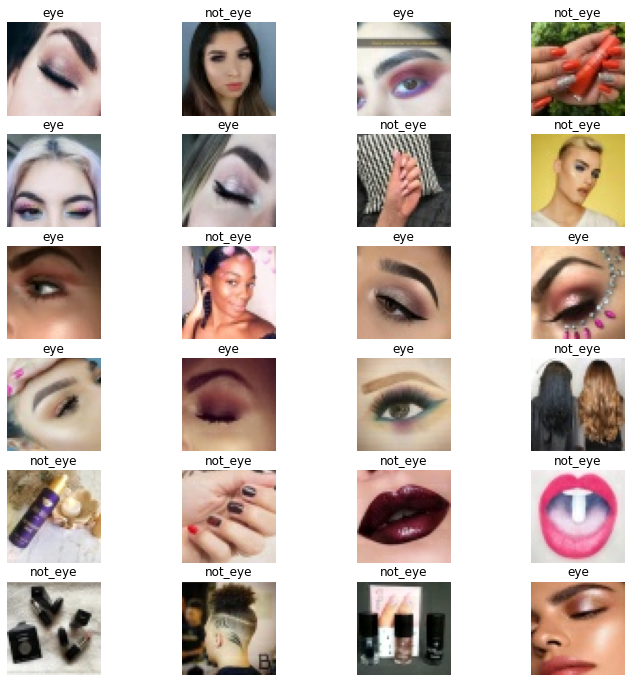

In [328]:
plt.figure(figsize=(12, 12))
for images, labels in eye_test_images.take(1):
    for i in range(len(eye_predictions)):
        ax = plt.subplot(6, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(eye_test_images.class_names[labels[i]])
        plt.axis("off")

## Beauty >> Lips Model

In [298]:
lips_images = image_classes_folder_base + 'Lips/'

In [299]:
lips_train_images = tf.keras.preprocessing.image_dataset_from_directory(
    lips_images,
    labels='inferred',
    label_mode='int',
    class_names=['lips', 'not_lips'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.15,
    subset="training"
)

Found 450 files belonging to 2 classes.
Using 383 files for training.


In [300]:
lips_validation_images = tf.keras.preprocessing.image_dataset_from_directory(
    lips_images,
    labels='inferred',
    label_mode='int',
    class_names=['lips', 'not_lips'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.15,
    subset="validation"
)

Found 450 files belonging to 2 classes.
Using 67 files for validation.


In [301]:
lips_model = Sequential()

# CONVOLUTIONAL LAYER
lips_model.add(Conv2D(filters=32,
                      kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                      kernel_size=(3, 3),
                      input_shape=(50, 50, 3),
                      activation='relu'))

# POOLING LAYER
lips_model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
lips_model.add(Conv2D(filters=64,
                      kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                      kernel_size=(3, 3),
                      activation='relu'))

# POOLING LAYER & DROPOUT
lips_model.add(MaxPool2D(pool_size=(2, 2)))
lips_model.add(Dropout(0.5))

# CONVOLUTIONAL LAYER
lips_model.add(Conv2D(filters=64,
                      kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                      kernel_size=(3, 3),
                      activation='relu'))

# POOLING LAYER & DROPOUT
lips_model.add(MaxPool2D(pool_size=(2, 2)))
lips_model.add(Dropout(0.5))

# FLATTEN IMAGES FROM 50 by 50 to 2500 BEFORE FINAL LAYER
lips_model.add(Flatten(input_shape=(50, 50, 3)))

# 128 NEURONS IN DENSE HIDDEN LAYER
lips_model.add(Dense(128,
                     kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                     activation='relu'))
lips_model.add(Dropout(0.5))

# 64 NEURONS IN DENSE HIDDEN LAYER
lips_model.add(Dense(64,
                     kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                     activation='relu'))
lips_model.add(Dropout(0.5))

# LAST LAYER IS THE CLASSIFIER
lips_model.add(Dense(1, activation='sigmoid'))

In [302]:
lips_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 11, 11, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 9, 9, 64)         

In [303]:
lips_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [304]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [305]:
lips_history = lips_model.fit(lips_train_images,
                              validation_data=lips_validation_images,
                              epochs=150,
                              callbacks=[early_stop])

Epoch 1/150
12/12 [==============================] - 2s 56ms/step - loss: 24.7051 - accuracy: 0.5039 - val_loss: 8.8015 - val_accuracy: 0.6119
Epoch 2/150
12/12 [==============================] - 1s 43ms/step - loss: 10.9008 - accuracy: 0.5483 - val_loss: 8.4081 - val_accuracy: 0.5821
Epoch 3/150
12/12 [==============================] - 1s 43ms/step - loss: 8.8489 - accuracy: 0.5509 - val_loss: 8.3202 - val_accuracy: 0.6269
Epoch 4/150
12/12 [==============================] - 1s 43ms/step - loss: 8.3918 - accuracy: 0.5692 - val_loss: 8.2398 - val_accuracy: 0.5672
Epoch 5/150
12/12 [==============================] - 1s 43ms/step - loss: 8.3158 - accuracy: 0.5300 - val_loss: 8.1719 - val_accuracy: 0.5224
Epoch 6/150
12/12 [==============================] - 1s 43ms/step - loss: 8.2234 - accuracy: 0.4935 - val_loss: 8.1072 - val_accuracy: 0.4328
Epoch 7/150
12/12 [==============================] - 0s 40ms/step - loss: 8.0883 - accuracy: 0.5379 - val_loss: 8.0382 - val_accuracy: 0.5075
Epoc

12/12 [==============================] - 1s 44ms/step - loss: 4.8147 - accuracy: 0.9060 - val_loss: 4.8752 - val_accuracy: 0.8806
Epoch 59/150
12/12 [==============================] - 1s 44ms/step - loss: 4.7368 - accuracy: 0.8982 - val_loss: 4.7724 - val_accuracy: 0.8955
Epoch 60/150
12/12 [==============================] - 1s 44ms/step - loss: 4.6485 - accuracy: 0.9295 - val_loss: 4.7141 - val_accuracy: 0.9104
Epoch 61/150
12/12 [==============================] - 1s 45ms/step - loss: 4.6232 - accuracy: 0.9295 - val_loss: 4.7048 - val_accuracy: 0.8955
Epoch 62/150
12/12 [==============================] - 1s 45ms/step - loss: 4.5328 - accuracy: 0.9191 - val_loss: 4.6288 - val_accuracy: 0.8806
Epoch 63/150
12/12 [==============================] - 1s 45ms/step - loss: 4.4895 - accuracy: 0.9191 - val_loss: 4.5639 - val_accuracy: 0.8955
Epoch 64/150
12/12 [==============================] - 1s 46ms/step - loss: 4.4934 - accuracy: 0.9034 - val_loss: 4.5487 - val_accuracy: 0.8657
Epoch 65/150

12/12 [==============================] - 1s 49ms/step - loss: 2.3378 - accuracy: 0.9634 - val_loss: 2.4195 - val_accuracy: 0.9403
Epoch 116/150
12/12 [==============================] - 1s 47ms/step - loss: 2.2922 - accuracy: 0.9687 - val_loss: 2.4200 - val_accuracy: 0.9254
Epoch 117/150
12/12 [==============================] - 1s 46ms/step - loss: 2.2870 - accuracy: 0.9556 - val_loss: 2.4215 - val_accuracy: 0.9403
Epoch 118/150
12/12 [==============================] - 1s 47ms/step - loss: 2.2439 - accuracy: 0.9687 - val_loss: 2.4287 - val_accuracy: 0.9254
Epoch 119/150
12/12 [==============================] - 1s 46ms/step - loss: 2.2314 - accuracy: 0.9530 - val_loss: 2.3894 - val_accuracy: 0.8955
Epoch 120/150
12/12 [==============================] - 1s 47ms/step - loss: 2.1750 - accuracy: 0.9713 - val_loss: 2.3842 - val_accuracy: 0.8806
Epoch 121/150
12/12 [==============================] - 1s 48ms/step - loss: 2.2077 - accuracy: 0.9452 - val_loss: 2.3318 - val_accuracy: 0.9254
Epoch 

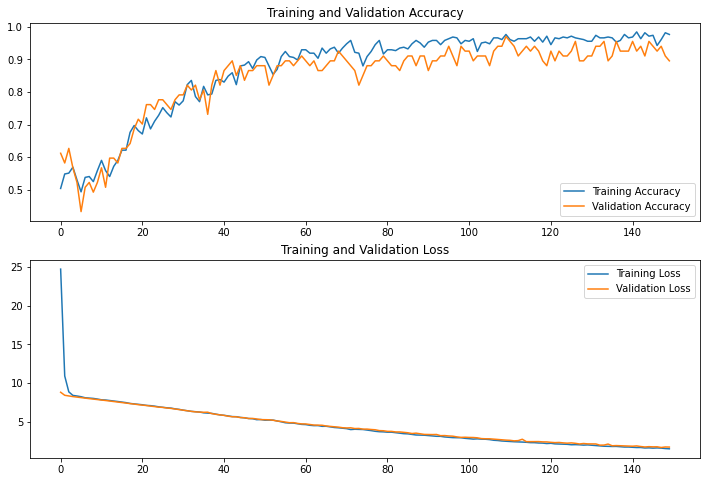

In [306]:
acc = lips_history.history['accuracy']
val_acc = lips_history.history['val_accuracy']

loss = lips_history.history['loss']
val_loss = lips_history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

### Testing Beauty >> Lips Model

In [316]:
test_image_lips_folder_base = test_image_folder_base + 'Lips/'

In [317]:
lips_test_images = tf.keras.preprocessing.image_dataset_from_directory(
    test_image_lips_folder_base,
    labels='inferred',
    label_mode='int',
    class_names=['lips', 'not_lips'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=None,
    subset=None
)

Found 16 files belonging to 2 classes.


In [318]:
lips_predictions = lips_model.predict(lips_test_images)
print(lips_predictions)

[[0.99823165]
 [0.99993575]
 [0.9985385 ]
 [0.98957205]
 [0.99893177]
 [0.9999758 ]
 [0.3031559 ]
 [0.98976886]
 [0.98413503]
 [0.9984995 ]
 [0.99278563]
 [0.97658706]
 [0.9691123 ]
 [0.8618313 ]
 [0.00219801]
 [0.99977815]]


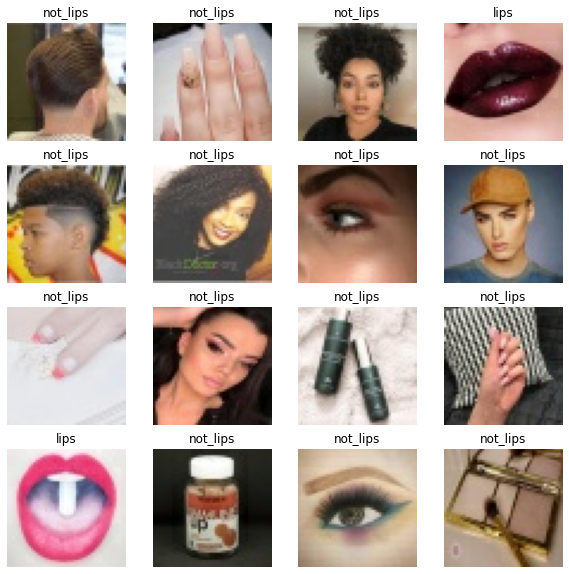

In [322]:
plt.figure(figsize=(10, 10))
for images, labels in lips_test_images.take(1):
    for i in range(len(lips_predictions)):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(lips_test_images.class_names[labels[i]])
        plt.axis("off")